In [1]:
import json
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
texts = {}
titles = {}
labels = {}
allScores = []

with open('instances.jsonl') as file:
    for line in file.readlines():
        d = json.loads(line)
        texts[d['id']] = " ".join([p for p in d['targetParagraphs']])
        titles[d['id']] = d['targetTitle']

with open('truth.jsonl') as file:
    for line in file.readlines():
        d = json.loads(line)
        labels[d['id']] = d['truthMean']
        for score in d['truthJudgments']:
            allScores.append(score)

In [3]:
len(texts), len(labels), len(titles), len(allScores)/5

(19538, 19538, 19538, 19538.0)

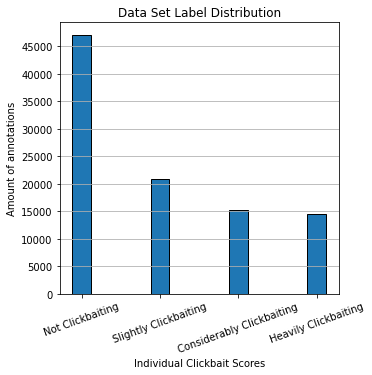

In [16]:
plt.figure(figsize=(5,5))
unique, counts = np.unique(allScores,return_counts=True)
#counts = [c/len(allScores) for c in counts]
plt.bar(unique,counts, width=0.08, edgecolor='black')
plt.grid(axis='y')
plt.xticks(ticks=unique, rotation=20,labels=["Not Clickbaiting", "Slightly Clickbaiting","Considerably Clickbaiting", "Heavily Clickbaiting"])
plt.yticks(range(0,50000,5000))
plt.xlabel('Individual Clickbait Scores')
plt.ylabel('Amount of annotations')
plt.title("Data Set Label Distribution")
plt.show()

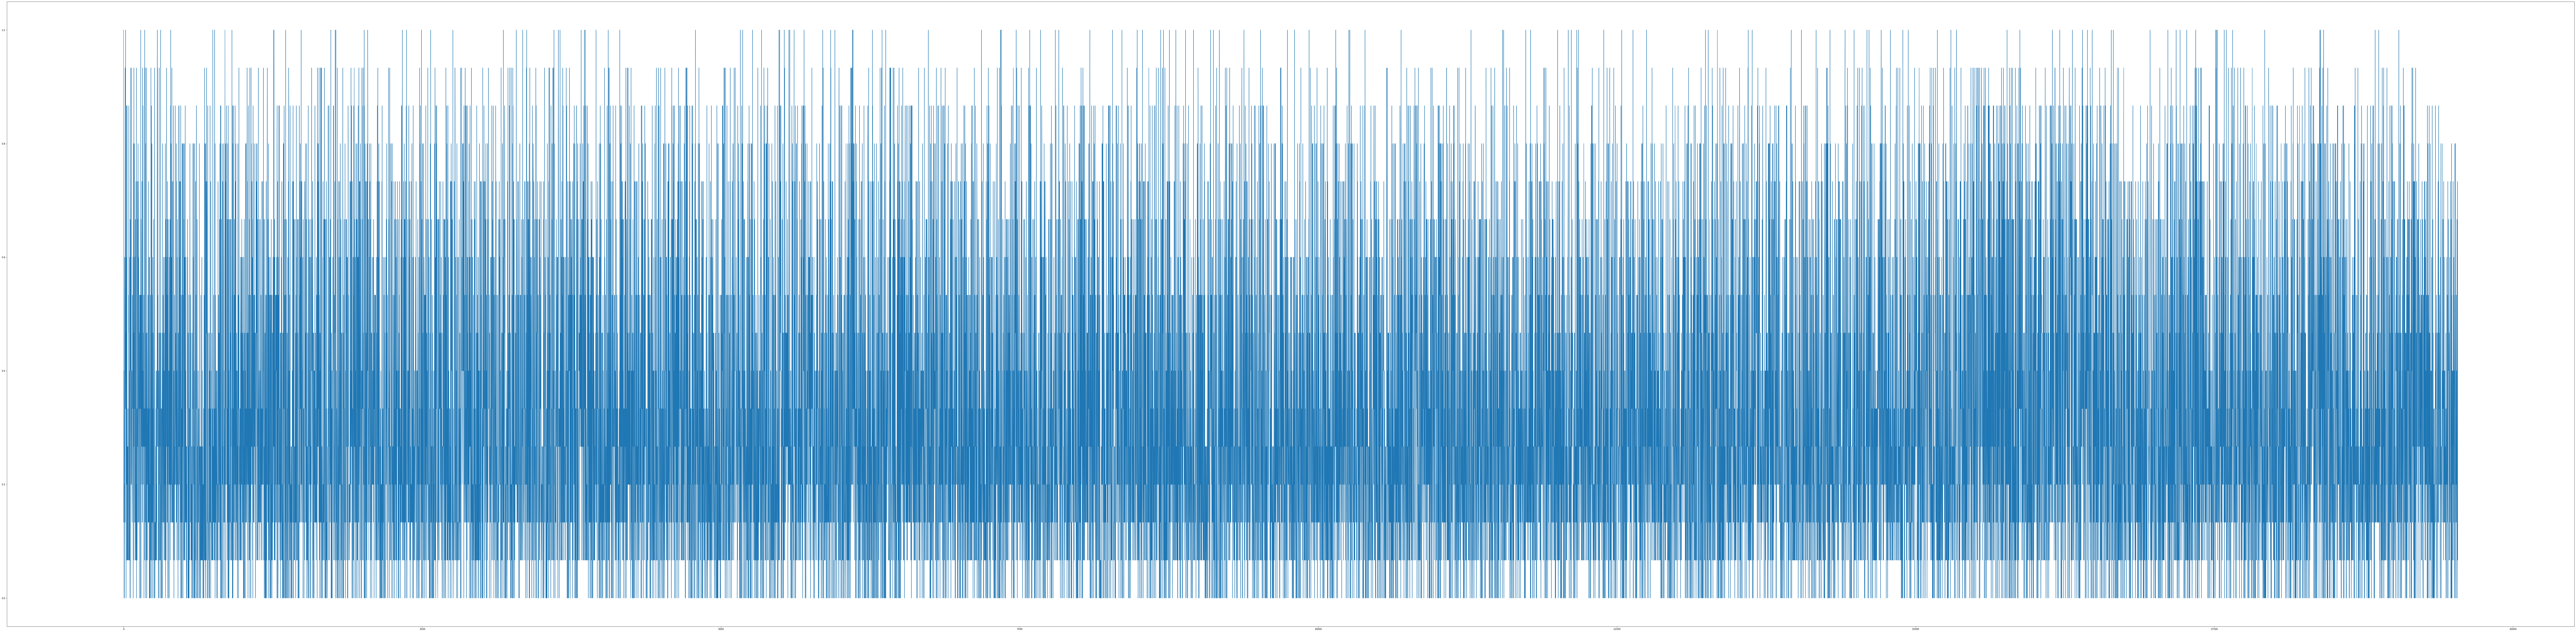

In [63]:
plt.figure(figsize=(200,50))
plt.plot(range(len(labels)),[v for v in labels.values()])
plt.show()

In [66]:
df = DataFrame([v for v in labels.values()])
df.describe()

,0
count,19538.000000
mean,0.324530
std,0.252824
min,0.000000
25%,0.133333
50%,0.266667
75%,0.466667
max,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19538 entries, 0 to 19537
Data columns (total 1 columns):
0    19538 non-null float64
dtypes: float64(1)
memory usage: 152.8 KB


In [70]:
for key,value in titles.items():
    print(value, '\n')
    print(texts[key])
    break

‘Inexcusable’ failures in UK’s response to modern slavery leaving victims destitute while abusers go free, report warns 

Thousands of modern slavery victims have not come forward, while others who have chosen to report their enslavers have ended up destitute as a result of insufficient support, say MPs “Inexcusable” failures in the UK’s system for dealing with modern slavery are leaving victims reduced to destitution while their abusers go free because they are not adequately supported to testify against them, an alarming report has warned. Thousands of victims have not come forward, while others who have chosen to give evidence against their enslavers have ended up destitute as a result of insufficient support, according to a report published today by the Work and Pensions Committee. It is estimated there are between 10,000 and 13,000 victims of modern slavery in the UK, but the report warns that failings in the current mechanism mean that once they are identified, they have no autom